In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy import stats

from subprocess import check_output

# Any results you write to the current directory are saved as output.
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [2]:
data = pd.read_csv('full_data2.csv')

In [3]:
small_data = data[['Age_Band_of_Driver', 'Date']]

In [4]:
data_young = small_data[(small_data['Age_Band_of_Driver']==4)|(small_data['Age_Band_of_Driver']==5)]

In [5]:
data_others = small_data[(small_data['Age_Band_of_Driver']==9)|(small_data['Age_Band_of_Driver']==10)|(small_data['Age_Band_of_Driver']==11)]

In [6]:
young_dist = list(data_young.groupby(['Date']).count().Age_Band_of_Driver)

In [7]:
others_dist = list(data_others.groupby(['Date']).count().Age_Band_of_Driver)

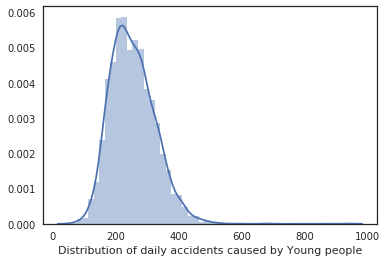

In [9]:
sns.distplot(young_dist, axlabel='Distribution of daily accidents caused by Young people')

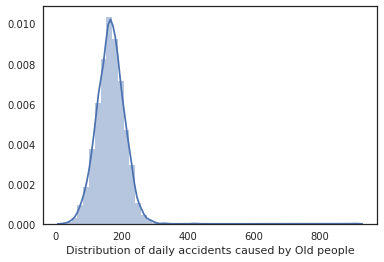

In [10]:
sns.distplot(others_dist, axlabel='Distribution of daily accidents caused by Old people')

Confidence Intervals of the difference of the means

In [11]:
z_score = 1.645

In [12]:
young_var = np.var(young_dist)
old_var = np.var(others_dist)

In [13]:
ci_max = (np.mean(young_dist) - np.mean(others_dist) + (z_score*np.sqrt(young_var/len(young_dist)+old_var/len(others_dist))))

In [14]:
ci_min = (np.mean(young_dist) - np.mean(others_dist) - (z_score*np.sqrt(young_var/len(young_dist)+old_var/len(others_dist))))

In [15]:
ci_max

89.83296512023281

In [16]:
ci_min

85.32311374066535

Wald's Test

In [71]:
stats.ttest_ind(young_dist, others_dist, equal_var=False)

Ttest_indResult(statistic=63.88066352773539, pvalue=0.0)